# UE Rate Statewide Data Clean Up and Analysis


### Understanding Homelessness¶

### Table of Contents
    * Introduction
    * Gather Data
    * Assess
    * Clean Data
    * Exploratory Data Analysis
 

## Introduction

### Key Homelessness Issues
    * What is homelessness and define challenges
    * Causes of homelessness
    * Homelessness classifications including chronic, sheltered/unsheltered
    
### Point in Time Counts
    * History of counts
    * Methodological issues
    * Rationale for category inclusions

### Data Background
    * Originally was going to use a dataset from Kaggle but decided to pull straight from HUD-CoC site
    * What is the Continuum of Care (CoC) Program?
    * CoC-HUD Summary Reports: CoC Homeless Populations and Subpopulations Reports

### Other Resources
    * CoC Dashboard Reports
    * CoC Housing Inventory Count Reports

In [1]:
# Dependencies and Setup
import csv
import pandas as pd
import os
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
%matplotlib inline
from scipy import stats

# Study data files
UE_data_path = "../Data/Unemployment_rates_states_5yrs_Clean.csv"

UE_data_path = pd.read_csv(UE_data_path)
UE_data_path.head(20)

,State,1/1/2015,2/1/2015,3/1/2015,4/1/2015,5/1/2015,6/1/2015,7/1/2015,8/1/2015,9/1/2015,...,12/1/2019,1/1/2020,2/1/2020,3/1/2020,4/1/2020,5/1/2020,6/1/2020,7/1/2020,8/1/2020,9/20/2020
0,Alabama,6.0,6.0,6.1,6.1,6.2,6.2,6.2,6.1,6.1,...,2.7,2.7,2.7,3,13.8,9.6,7.6,7.9,5.6,6.6
1,Alaska,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,6.5,...,6.1,6.0,5.8,5.2,13.5,12.7,12.4,11.6,7.4,7.2
2,Arizona,6.4,6.3,6.3,6.2,6.1,6.1,6.0,6.0,5.9,...,4.5,4.5,4.5,6.1,13.4,9.0,10.0,10.7,5.9,6.7
3,Arkansas,5.6,5.5,5.5,5.4,5.3,5.1,5.0,4.8,4.7,...,3.5,3.5,3.5,5,10.8,9.6,8.1,7.1,7.4,7.3
4,California,6.8,6.7,6.6,6.5,6.4,6.2,6.1,6.0,5.9,...,3.9,3.9,3.9,5.5,16.4,16.4,14.9,13.5,11.2,11.0
5,Colorado,4.3,4.2,4.2,4.1,4.1,4.0,3.8,3.7,3.6,...,2.5,2.5,2.5,5.2,12.2,10.2,10.6,7.4,6.7,6.4
6,Connecticut,6.1,6.0,5.9,5.8,5.7,5.7,5.6,5.6,5.6,...,3.8,3.7,3.8,3.4,8.3,9.6,10.1,10.2,8.1,7.8
7,Delaware,5.1,5.0,5.0,4.9,4.9,4.9,4.8,4.8,4.8,...,4.0,4.0,3.9,5,14.9,15.9,12.6,10.5,8.9,8.2
8,District of Columbia,7.4,7.3,7.2,7.1,7.0,6.9,6.8,6.7,6.6,...,5.3,5.2,5.1,6,11.7,8.8,8.7,8.5,8.6,8.7
9,Florida,5.8,5.7,5.7,5.6,5.6,5.5,5.4,5.4,5.3,...,2.9,2.8,2.8,4.4,13.8,13.7,10.3,11.4,7.3,7.6


In [2]:
print ("data-frame shape: ", UE_data_path.shape)

data-frame shape:  (52, 70)


In [3]:
col = []
for x in UE_data_path.columns:
    if x != "State":
        col.append(x)

col

['1/1/2015',
 '2/1/2015',
 '3/1/2015',
 '4/1/2015',
 '5/1/2015',
 '6/1/2015',
 '7/1/2015',
 '8/1/2015',
 '9/1/2015',
 '10/1/2015',
 '11/1/2015',
 '12/1/2015',
 '1/1/2016',
 '2/1/2016',
 '3/1/2016',
 '4/1/2016',
 '5/1/2016',
 '6/1/2016',
 '7/1/2016',
 '8/1/2016',
 '9/1/2016',
 '10/1/2016',
 '11/1/2016',
 '12/1/2016',
 '1/1/2017',
 '2/1/2017',
 '3/1/2017',
 '4/1/2017',
 '5/1/2017',
 '6/1/2017',
 '7/1/2017',
 '8/1/2017',
 '9/1/2017',
 '10/1/2017',
 '11/1/2017',
 '12/1/2017',
 '1/1/2018',
 '2/1/2018',
 '3/1/2018',
 '4/1/2018',
 '5/1/2018',
 '6/1/2018',
 '7/1/2018',
 '8/1/2018',
 '9/1/2018',
 '10/1/2018',
 '11/1/2018',
 '12/1/2018',
 '1/1/2019',
 '2/1/2019',
 '3/1/2019',
 '4/1/2019',
 '5/1/2019',
 '6/1/2019',
 '7/1/2019',
 '8/1/2019',
 '9/1/2019',
 '10/1/2019',
 '11/1/2019',
 '12/1/2019',
 '1/1/2020',
 '2/1/2020',
 '3/1/2020',
 '4/1/2020',
 '5/1/2020',
 '6/1/2020',
 '7/1/2020',
 '8/1/2020',
 '9/20/2020']

In [4]:
d = []
for i, row in UE_data_path.iterrows():
    state = row["State"]
    for x in col:
        dat = x.split("/")
        a ={
            "State":state,
            "Date": f"{dat[0].rjust(2, '0')}-{dat[1].rjust(2, '0')}-{dat[2]}",
            "Year": dat[2],
            "Month": dat[0],
            "Unemployment Rate":row[x]
        }
        d.append(a)

In [5]:
UENew_df = pd.DataFrame(d)
UENew_df.head(20)

,State,Date,Year,Month,Unemployment Rate
0,Alabama,01-01-2015,2015,1,6
1,Alabama,02-01-2015,2015,2,6
2,Alabama,03-01-2015,2015,3,6.1
3,Alabama,04-01-2015,2015,4,6.1
4,Alabama,05-01-2015,2015,5,6.2
5,Alabama,06-01-2015,2015,6,6.2
6,Alabama,07-01-2015,2015,7,6.2
7,Alabama,08-01-2015,2015,8,6.1
8,Alabama,09-01-2015,2015,9,6.1
9,Alabama,10-01-2015,2015,10,6


In [6]:
print ("column names: ", UENew_df.columns.values)

column names:  ['State' 'Date' 'Year' 'Month' 'Unemployment Rate']


In [7]:
print ("total null values: ", UE_data_path.isna().sum().sum())

total null values:  0


In [8]:
UENew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3588 entries, 0 to 3587
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   State              3588 non-null   object
 1   Date               3588 non-null   object
 2   Year               3588 non-null   object
 3   Month              3588 non-null   object
 4   Unemployment Rate  3588 non-null   object
dtypes: object(5)
memory usage: 140.3+ KB


In [9]:
UENew_df["Unemployment Rate"] = pd.to_numeric(UENew_df["Unemployment Rate"], errors='coerce')
UENew_dfgroup_data = UENew_df.groupby("Month")["Unemployment Rate"].sum()
UENew_dfgroup_data

Month
1     1375.5
10    1112.0
11    1106.0
12    1100.9
2     1364.2
3     1378.9
4     1880.7
5     1788.3
6     1649.9
7     1608.8
8     1528.0
9     1493.3
Name: Unemployment Rate, dtype: float64

In [10]:
def month_num2abbr(month):
    month = int(month)
    import calendar
    months_abbr = {month: index for index, month in enumerate(calendar.month_abbr) if month}
    for abbr, month_num in months_abbr.items():
        if month_num==month:
            return abbr
    return False

In [11]:
# month_num2abbr(12)
months_df = UENew_dfgroup_data.to_frame().reset_index()
months_df["Month_Name"] = [month_num2abbr(x) for x in months_df["Month"].values]
months_df

,Month,Unemployment Rate,Month_Name
0,1,1375.5,Jan
1,10,1112.0,Oct
2,11,1106.0,Nov
3,12,1100.9,Dec
4,2,1364.2,Feb
5,3,1378.9,Mar
6,4,1880.7,Apr
7,5,1788.3,May
8,6,1649.9,Jun
9,7,1608.8,Jul


In [12]:
UENew_df["Unemployment Rate"] = pd.to_numeric(UENew_df["Unemployment Rate"], errors='coerce')
UENew_dfgroup_data = UENew_df.groupby("Year")["Unemployment Rate"].sum()
UENew_dfgroup_data

Year
2015    3227.1
2016    3002.0
2017    2686.2
2018    2436.7
2019    2315.4
2020    3719.1
Name: Unemployment Rate, dtype: float64

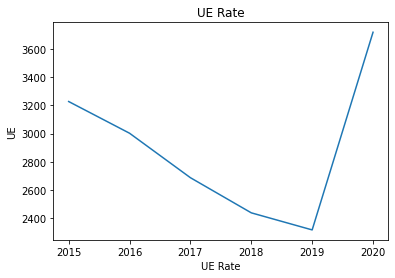

In [13]:
# Line
x_axis_Years = UENew_df["Year"]
UE_Rate = UENew_df["Unemployment Rate"]

plt.title('UE Rate')
plt.xlabel('UE Rate')
plt.ylabel('UE')
plt.plot(UENew_dfgroup_data.index, UENew_dfgroup_data.values)

plt.savefig("../Images/UERateLinePlot.png")
plt.show()

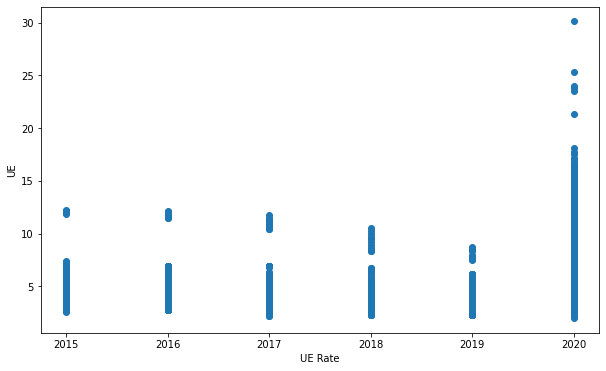

In [14]:
# Scatter
x_axis_Years = UENew_df["Year"]
UE_Rate = UENew_df["Unemployment Rate"]

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_Years,UE_Rate)
plt.xlabel("UE Rate")
plt.ylabel("UE")
plt.savefig("../Images/UERateScatterPlot.png")
plt.show()

In [15]:
# Homeless demo summary G+R
# read file
file_path01 = os.path.join("../Data/HUD_DemoDataGR_5yrs_Clean.xlsx")
HMDemoGR_df = pd.read_excel(file_path01, sheet_name ="Gender")
HMDemoGR_df.head(10)

,Year,Gender,Emergency Shelter,Transitional Housing,Unsheltered,Total
0,2019.0,Female,13538,5199,31730,50467
1,2019.0,Male,17015,6792,74597,98404
2,2019.0,Transgender,128,108,1528,1764
3,2019.0,Gender Non-Conforming,42,24,577,643
4,2018.0,Female,11918,5681,24892,42491
5,2018.0,Male,15444,7135,63231,85810
6,2018.0,Transgender,87,128,1037,1252
7,2018.0,Gender Non-Conforming,26,10,383,419
8,2017.0,Female,11600,6787,25097,43484
9,2017.0,Male,15089,8905,65604,89598


In [16]:
HMDemoGR_df.dropna(axis=1, how='any')
HMDemoGR_df.count()

Year                    20
Gender                  20
Emergency Shelter       21
Transitional Housing    21
Unsheltered             21
Total                   21
dtype: int64

In [17]:
# Demographic summary by Race
HMDemoRace_df = pd.read_excel(file_path01, sheet_name="Race")
HMDemoRace_df.head(10)

,Year,Race,Emergency Shelter,Transitional Housing,Unsheltered,Total
0,2019.0,Black or African-American,10729,3610,29747,44086
1,2019.0,White,16250,7026,58888,82164
2,2019.0,Asian,529,228,1849,2606
3,2019.0,American Indian or Alaska Native,949,336,5512,6797
4,2019.0,Native Hawaiian or Other Pacific Islander,362,205,1610,2177
5,2019.0,Multiple Races,1904,718,10826,13448
6,2018.0,Black or African-American,9269,4032,24469,37770
7,2018.0,White,15200,7459,50297,72956
8,2018.0,Asian,505,271,1562,2338
9,2018.0,American Indian or Alaska Native,869,309,4213,5391


In [18]:
HMDemoRace_df.dropna(axis=1, how='any')
HMDemoRace_df.count()

Year                    30
Race                    30
Emergency Shelter       31
Transitional Housing    31
Unsheltered             31
Total                   31
dtype: int64

C:\Users\navis\.conda\envs\Pythondata\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


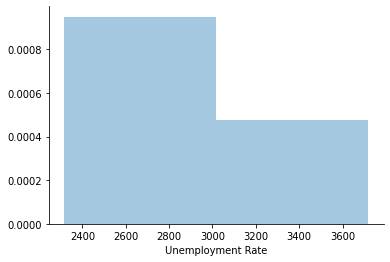

In [19]:
sns.distplot(UENew_dfgroup_data, kde=False, norm_hist=True)
sns.despine()